In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob
import cv2
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [8]:
def image_preprocessing(image):
    height, _, _ = image.shape
    image = image[int(height/2):,:,:]  # remove top half of the image, as it is not relavant for lane following
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)  # Nvidia model said it is best to use YUV color space
    image = cv2.GaussianBlur(image, (3,3), 0)
    image = cv2.resize(image, (200,66)) # input image size (200,66) Nvidia model
    #image = image / 255.0 # normalizing, the processed image becomes black for some reason.  do we need this?
    return image

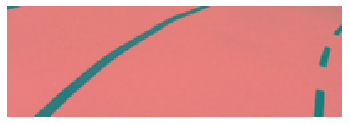

In [9]:
PATH='/Users/xmxhuihui/Jupyter Notebook/Tensorflow/Self_Driving_Car_Project/Figures/Track'
IMAGE_PATHS=glob.glob(os.path.join(PATH,'*.png'))
for image_path in IMAGE_PATHS:
    original_image=plt.imread(image_path)
    image=image_preprocessing(original_image)
    plt.axis('off')
    plt.imshow(image)
    plt.savefig(os.path.join('/Users/xmxhuihui/Jupyter Notebook/Tensorflow/Self_Driving_Car_Project/Figures/Track Preprocessing',os.path.basename(image_path)),bbox_inches = 'tight')